In [1]:
# Project Title Next Movie Production

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Read the CSV and create first dataframe
firstdf = pd.read_csv("../Cleaned Data/cleaned_movie_data.csv")
#drop 2023 movies because we only have half year's worth of data for this year
firstdf = firstdf.loc[firstdf["Release Year"] != 2023]

In [4]:
firstdf.head(5)

,Movie ID,Title,Average Rating (Out of 10),Number of User Ratings,TMDb Popularity Score,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Date,...,Genre 3,Genre 4,Genre 5,Runtime (Minutes),1st Billing,2nd Billing,3rd Billing,4th Billing,5th Billing,Director
0,11688,The Emperor's New Groove,7.5,6007,86.051,169327687,69327687,0.693277,100000000,2000-12-15,...,Comedy,Family,Fantasy,78,David Spade,John Goodman,Eartha Kitt,Patrick Warburton,Wendie Malick,Mark Dindal
1,4247,Scary Movie,6.3,6247,88.909,278019771,259019771,13.632620,19000000,2000-07-07,...,NaN,NaN,NaN,88,Anna Faris,Jon Abrahams,Marlon Wayans,Shawn Wayans,Regina Hall,Keenen Ivory Wayans
2,9600,Big Momma's House,5.8,2096,81.102,173959438,143959438,4.798648,30000000,2000-05-31,...,NaN,NaN,NaN,98,Martin Lawrence,Nia Long,Paul Giamatti,Jascha Washington,Terrence Howard,Raja Gosnell
3,98,Gladiator,8.2,16708,67.513,465361176,362361176,3.518070,103000000,2000-05-04,...,Adventure,NaN,NaN,155,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Richard Harris,Ridley Scott
4,955,Mission: Impossible II,6.1,5985,64.994,546388105,421388105,3.371105,125000000,2000-05-24,...,Thriller,NaN,NaN,123,Tom Cruise,Dougray Scott,Thandiwe Newton,Ving Rhames,Richard Roxburgh,John Woo


In [5]:
firstdf.dtypes

Movie ID                         int64
Title                           object
Average Rating (Out of 10)     float64
Number of User Ratings           int64
TMDb Popularity Score          float64
Gross Revenue                    int64
Net Revenue                      int64
Net Revenue (% Over Budget)    float64
Budget                           int64
Release Date                    object
Release Day                      int64
Release Month                    int64
Release Year                     int64
Genre 1                         object
Genre 2                         object
Genre 3                         object
Genre 4                         object
Genre 5                         object
Runtime (Minutes)                int64
1st Billing                     object
2nd Billing                     object
3rd Billing                     object
4th Billing                     object
5th Billing                     object
Director                        object
dtype: object

In [6]:
# Q1 Movie revenue by month?
# Create a graph that shows fluctations in revenue by month and year
# Ideas of info we can show:
    # What month has the highest and lowest revenue?
    # In the last 5 years, provide the highest grossing film or the year and month of release.
    # Accounting for peak COVID (2020-2021) - based on data, is there a significant change around this time in comparison to pre-covid (before 2020) and post-peak-covid (2022-2023)?


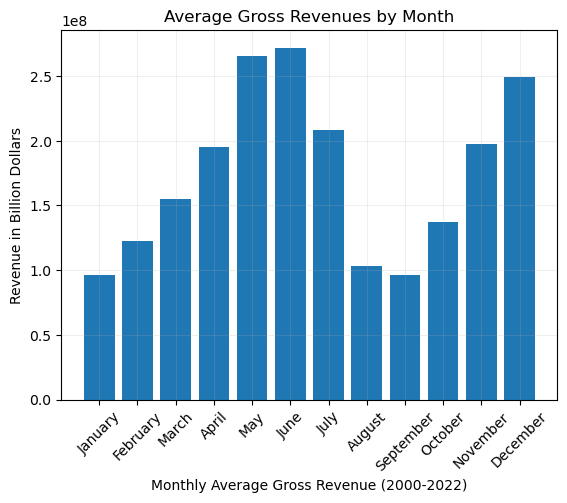

In [7]:
# Q1 Movie revenue by month?
#Start by creating a separate dataframe for Release Month, and Gross Revenue
rev_month_df = firstdf[["Release Month", "Gross Revenue"]].copy()

#Group the data by Month and run mean() method to obtain averages
grp_mnth = rev_month_df.groupby(["Release Month"])
rev_by_mnth = grp_mnth.mean()

#Build and show revenue by month averages based on rev_by_mnth 
months_labels = ["January", "February", "March", "April", "May", "June", "July",
                "August", "September", "October", "November", "December"]

#plot construction
x = np.arange(len(rev_by_mnth))
plt.bar(x, rev_by_mnth["Gross Revenue"])
plt.xticks(x, months_labels, rotation=45)
plt.xlabel("Monthly Average Gross Revenue (2000-2022)")
plt.ylabel("Revenue in Billion Dollars")
plt.title("Average Gross Revenues by Month")
plt.yscale("linear")
plt.grid(alpha=.2)
#export plot to image file
plt.savefig("../../Analysis/Visualizations/avg_rev_by_month.png", bbox_inches='tight')
#show the plot
plt.show()

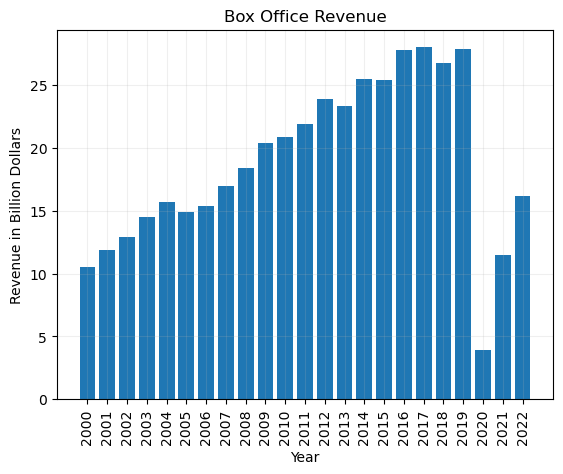

In [8]:
# Q1 Movie revenue by year?
#Start by creating a separate dataframe for Release year, and Gross Revenue
rev_year_df = firstdf[["Release Year", "Gross Revenue"]].copy()

#Group the data by Year and run sum() method to obtain totals
grp_year = rev_year_df.groupby(["Release Year"])
rev_by_year = grp_year.sum()/1000000000 #get value in billions

#Build and show revenue by month averages based on rev_by_mnth 
year_labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006",
                "2007", "2008", "2009", "2010", "2011", "2012", "2013",
              "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

#plot construction
x = np.arange(len(rev_by_year))
plt.bar(x, rev_by_year["Gross Revenue"])
plt.xticks(x, year_labels, rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Revenue in Billion Dollars")
plt.title("Box Office Revenue")

plt.grid(alpha=.2)
#export plot to image file
plt.savefig("../../Analysis/Visualizations/rev_by_year.png", bbox_inches='tight')
#show the plot
plt.show()


Explorations on averages

In [9]:
#2019 to 2020 revenue difference
df_2019 = firstdf.loc[firstdf["Release Year"] == 2019]
rev_2019 = df_2019["Gross Revenue"].sum()/1000000000
df_2020 = firstdf.loc[firstdf["Release Year"] == 2020]
rev_2020 = df_2020["Gross Revenue"].sum()/1000000000
rev_diff_perc = round(((rev_2020-rev_2019)/rev_2019)*100)

print(f"Data shows there is a {rev_diff_perc}% change in gross revenue from 2019 to 2020.")

Data shows there is a -86% change in gross revenue from 2019 to 2020.


In [10]:
#Average number of movies released per month
avg_df = firstdf[["Release Year", "Release Month", "Title"]].copy()
avg_rel_grp = avg_df.groupby(["Release Month"])
avg_releases = avg_rel_grp.count()/23 #divide total number of releases over the years by the number of years
avg_releases

,Release Year,Title
Release Month,,
1,6.565217,6.565217
2,8.173913,8.173913
3,9.260870,9.260870
4,6.652174,6.652174
5,8.086957,8.086957
6,9.260870,9.260870
7,9.043478,9.043478
8,9.695652,9.695652
9,11.304348,11.304348


In [11]:
#What month has the highest and lowest revenue? (on average)
rev_sorted = rev_by_mnth["Gross Revenue"].sort_values(ascending=False)
rev_sorted
print("May is the highest grossing month and September is the lowest gross month on average.")

May is the highest grossing month and September is the lowest gross month on average.


In [12]:
# In the last 5 years, provide the highest grossing film or the year and month of release.
last5years_df = firstdf.loc[(firstdf["Release Year"] == 2022) | (firstdf["Release Year"] == 2021) | (firstdf["Release Year"] == 2020)
                           | (firstdf["Release Year"] == 2019)| (firstdf["Release Year"] == 2018)]

sorted_last5 = last5years_df.sort_values("Gross Revenue", ascending=False)
hg_film = sorted_last5.iloc[0]
hg_title = hg_film["Title"]
hg_revenue = hg_film["Gross Revenue"]/1000000000 #get revenue in billions
hg_rd = hg_film["Release Date"]
hg_actor1 = hg_film["1st Billing"]
hg_actor2 = hg_film["2nd Billing"]
hg_actor3 = hg_film["3rd Billing"]
hg_actor4 = hg_film["4th Billing"]
hg_actor5 = hg_film["5th Billing"]
hg_director = hg_film["Director"]
hg_budget = hg_film["Budget"]/1000000000 #get budget in billions
hg_nr = hg_film["Net Revenue"]/1000000000
print(f"Highest grossing movie in the last 5 years is {hg_title}.")
print(f"{hg_title} cast includes {hg_actor1}, {hg_actor2}, {hg_actor3}, {hg_actor4}, {hg_actor5}, and was directed by {hg_director}.")
print(f"{hg_title}'s budget was ${hg_budget} billion dollars and box office revenue was ${hg_revenue} billion.")
print(f"Box office profts was ${hg_nr} billion.")

Highest grossing movie in the last 5 years is Avengers: Endgame.
Avengers: Endgame cast includes Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth, Scarlett Johansson, and was directed by Anthony Russo.
Avengers: Endgame's budget was $0.356 billion dollars and box office revenue was $2.794731755 billion.
Box office profts was $2.438731755 billion.


In [13]:
# Q2 Movie revenue by genre?
#Run code to see how many different genres are there for the primary genre
genredf = firstdf[["Gross Revenue", "Genre 1", "Release Year"]]
populargenres = firstdf["Genre 1"].value_counts()
populargenres

Action             497
Drama              429
Comedy             388
Horror             223
Adventure          210
Animation          145
Thriller           119
Crime               93
Science Fiction     91
Fantasy             89
Family              80
Romance             48
Mystery             29
War                 23
Music               12
Western              7
History              6
Documentary          1
Name: Genre 1, dtype: int64

Above shows most occurring genres over the last 23 years. For Genre analysis, we will look at the primary genre
of the movie and look at the seven most popular.

In [14]:
#Analyze performance of the top 7 genres
topgenres = ["Action", "Drama", "Comedy", "Horror", "Adventure", "Animation", "Thriller"]

# Create empty list to fill with tumor vol data (for plotting)
revenues = []
genreoutliers = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for genre in topgenres:
    genrerevenue = firstdf.loc[firstdf["Genre 1"] == genre, "Gross Revenue"]
    revenues.append(genrerevenue)
    #calculate the statistics per drug regimen that we are looping through
    quartiles = genrerevenue.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],6)
    upperq = round(quartiles[0.75], 6)
    iqr = round(upperq-lowerq, 6)

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Locate outlisers
    outlierrows = firstdf.loc[firstdf["Genre 1"] == genre, ["Title", "Gross Revenue"]]
    
    # Determine outliers using upper and lower bounds and evaluating the tumor volume column
    outliers = outlierrows[(outlierrows['Gross Revenue'] >= upper_bound) | 
                                         (outlierrows['Gross Revenue'] <= lower_bound)]
    howmany = len(outliers)
    print(f"{genre} potential {howmany} outliers: {outliers}")
    
    #print(f"Genre {genre} lower quartile is {lowerq}, upper quartile is {upperq} and has {genreoutliers} outliers.")


Action potential 44 outliers:                                           Title  Gross Revenue
363                                Spider-Man 2      788976453
854                                      Avatar     2923706026
862                                        2012      791217826
978                                   Inception      825532764
1089       Mission: Impossible - Ghost Protocol      694713380
1160             Transformers: Dark of the Moon     1123794079
1213                     The Amazing Spider-Man      757930663
1214                      The Dark Knight Rises     1081041287
1239                                    Skyfall     1142471295
1328                                 Iron Man 3     1215577205
1329                               Man of Steel      668045518
1457                   The Amazing Spider-Man 2      708962323
1458  The Hobbit: The Battle of the Five Armies      956019788
1477                 X-Men: Days of Future Past      747862775
1478                    G

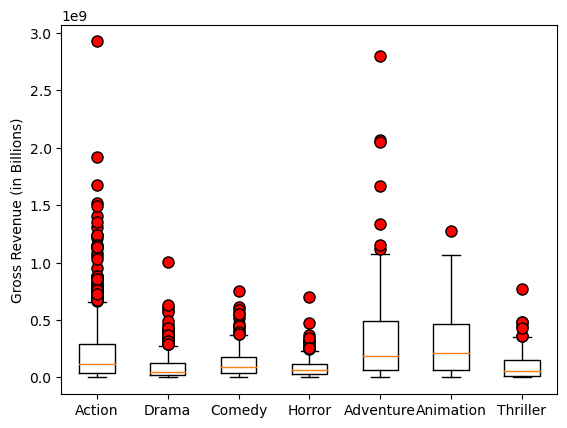

<Figure size 640x480 with 0 Axes>

In [15]:
#create boxplot for genre revenue
flierprop = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Gross Revenue (in Billions)')
ax1.boxplot(revenues, flierprops=flierprop)
ax1.set_xticklabels(topgenres)
plt.show()

#export plot to image file
plt.savefig("../../Analysis/Visualizations/rev_gen_boxplot.png", bbox_inches='tight')

In [16]:
# Create a graph that shows the relation between genre and revenue by year
# Ideas of info we can show:
    # What is the top and lowest genre for each year?
    # Is there a genre that is prevalent as top genre in the last 5-10 years?
    # What genre is in decline YoY or getting popular YoY?

#Picked primary Genre and gross revenu
# plt.scatter(x=firstdf["Genre 1"], y=firstdf["Gross Revenue"])
# plt.xlabel("Genre")
# plt.ylabel("Gross Revenue")
# plt.show()

In [ ]:
# Q3 What are better times of the year for certain genres of movies to be released?
# Create a graph for movie genre trends by month and analyze if there is a correlation between genre and seasonality.
# Ideas of info we can show:
    # Is there a genre that is popular on certain months/season?
    # What type of genre is popular all year round?
    # Is there a genre that is only popular on certain months and not performing well in box office any other months/season?

